In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
iris = load_iris()

x = iris['data']
y = iris['target']

x = torch.FloatTensor(x)
y = torch.tensor(y, dtype=torch.long)

x, y = Variable(x), Variable(y)

In [3]:
class SingleHiddenNet(nn.Module):
    # define nn
    def __init__(self, n_features, n_hidden, n_output):
        super(SingleHiddenNet, self).__init__()
        self.hidden = nn.Linear(n_features, n_hidden)
        self.logits = nn.Linear(n_hidden, n_output)

    def forward(self, X):
        X = F.sigmoid(self.hidden(X))
        X = self.logits(X)
        out = F.log_softmax(X, dim=1)

        return out

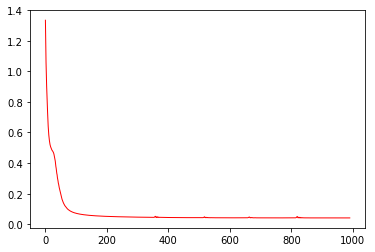

Final loss:  tensor(0.0405, device='cuda:0')


In [4]:
iris = load_iris()

x = iris['data']
y = iris['target']

x = torch.FloatTensor(x)
y = torch.tensor(y, dtype=torch.long)

x, y = Variable(x), Variable(y)

net = SingleHiddenNet(4, 5, 4)

use_cuda = torch.cuda.is_available()
print('use cuda: ', use_cuda)

if use_cuda:
    x = x.cuda()
    y = y.cuda()
    net = net.cuda()

optimizer = Adam(net.parameters(), lr=0.1)

px, py = [], []
for i in range(1000):
    logits = net(x)
    
    # loss = F.cross_entropy(logits, y)
    loss = F.nll_loss(logits, y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    # if i % 100 == 0:
    #     print(i, " loss: ", loss.data)
        
    px.append(i)
    py.append(loss.data)
    
    if i % 10 == 0:
        plt.plot(px, py, 'r-', lw=1)
        print(i, " loss: ", loss.data)
        display.clear_output(wait=True)
        plt.show()
        
print("Final loss: ", loss.data)

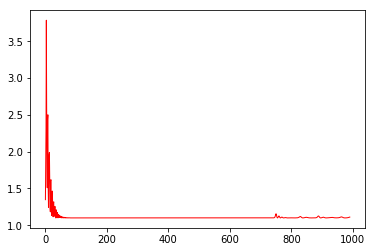

Final loss:  tensor(1.1009, device='cuda:0')


In [5]:
iris = load_iris()

x = iris['data']
y = iris['target']

x = torch.FloatTensor(x)
y = torch.tensor(y, dtype=torch.long)

x, y = Variable(x), Variable(y)

net = SingleHiddenNet(4, 5, 4)

use_cuda = torch.cuda.is_available()
print('use cuda: ', use_cuda)

if use_cuda:
    x = x.cuda()
    y = y.cuda()
    net = net.cuda()

optimizer = Adam(net.parameters(), lr=0.9)

px, py = [], []
for i in range(1000):
    logits = net(x)
    
    # loss = F.cross_entropy(logits, y)
    loss = F.nll_loss(logits, y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    # if i % 100 == 0:
    #     print(i, " loss: ", loss.data)
        
    px.append(i)
    py.append(loss.data)
    
    if i % 10 == 0:
        plt.plot(px, py, 'r-', lw=1)
        print(i, " loss: ", loss.data)
        display.clear_output(wait=True)
        plt.show()
        
print("Final loss: ", loss.data)

## Dataloader practice

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

import torch.utils.data as Data 

from sklearn.model_selection import train_test_split

In [7]:
class SingleHiddenNet(nn.Module):
    # define nn
    def __init__(self, n_features, n_hidden, n_output):
        super(SingleHiddenNet, self).__init__()
        self.hidden = nn.Linear(n_features, n_hidden)
        self.logits = nn.Linear(n_hidden, n_output)

    def forward(self, X):
        X = F.sigmoid(self.hidden(X))
        X = self.logits(X)
        out = F.log_softmax(X, dim=1)

        return out

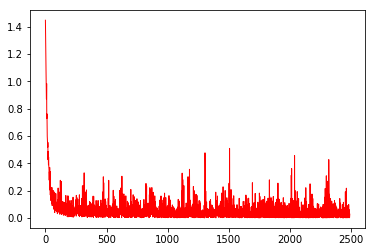

Epoch: 623, Loss: 0.07108


In [8]:
net = SingleHiddenNet(4, 5, 4)

iris = load_iris()
x = iris['data']
y = iris['target']

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2)

tr_x = torch.FloatTensor(x_tr)
tr_y = torch.tensor(y_tr)

te_x = torch.FloatTensor(x_te)
te_y = torch.tensor(y_te)

tr_x, tr_y = Variable(tr_x), Variable(tr_y)

te_x, te_y = Variable(te_x), Variable(te_y)

use_cuda = torch.cuda.is_available()
print('use cuda: ', use_cuda)

if use_cuda:
    tr_x = tr_x.cuda()
    tr_y = tr_y.cuda()
    
    net = net.cuda()
    
    te_x = te_x.cuda()
    te_y = te_y.cuda()
    
    
train_dataset = Data.TensorDataset(tr_x, tr_y)
train_loader = Data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = Data.TensorDataset(te_x, te_y)
test_loader = Data.DataLoader(test_dataset, batch_size=32, shuffle=True)

optimizer = Adam(net.parameters(), lr=0.1)

px, py = [], []
i = 0
for epoch in range(1000):
    for step, (batch_x, batch_y) in enumerate(train_loader): 
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        logits = net(b_x)

        loss = F.nll_loss(logits, b_y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        px.append(i)
        i += 1
        py.append(loss.data)

    plt.plot(px, py, 'r-', lw=1)
    print("Epoch: %d, Loss: %.5f" %(epoch, loss.data))
    display.clear_output(wait=True)
    plt.show()
        
print("Final loss: ", loss.data)


test_loss = 0
correct = 0
device = torch.device('cuda') if use_cuda else torch.device('cpu')
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = net(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))